In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
from yahoofinancials import YahooFinancials
from http.client import IncompleteRead

In [2]:
data = pd.read_csv('results/focus.csv', index_col=0)
df = data.head(5)

In [3]:
top_companies = []
for i, row in df.iterrows():
    print(i)
    top_companies.append(i)

ADMCM.HE
ICP1V.HE
VIAFIN.HE
NESTE.HE
GOFORE.HE


In [4]:
def price_history(company):
    max_try = 5
    attemp = 1
    while attemp < max_try:
        try:
            yf = YahooFinancials(company)
            data = yf.get_historical_price_data('2020-04-10', '2021-04-10', 'daily')
            data_1 = data[company]['prices']

        except IncompleteRead:
            attemp += 1
#                 sleep(10)
            if attemp == max_try:
                print(f'Failed {N}')
        except ValueError as e:
            print(f'{e}: {N}')
            attemp = max_try
        else:
            break
            
    df = pd.DataFrame.from_dict(data_1)
    df.to_csv(f"results/price_history_{company.split('.')[0]}.csv")

In [5]:
top_prices = []

for i in top_companies:
    price_history(i)    
    top_prices.append(f"results/price_history_{i.split('.')[0]}.csv")
    print(f"results/price_history_{i.split('.')[0]}.csv")

results/price_history_ADMCM.csv
results/price_history_ICP1V.csv
results/price_history_VIAFIN.csv
results/price_history_NESTE.csv
results/price_history_GOFORE.csv


In [6]:
df_top_companies = []
for i in top_prices:
    df = pd.read_csv(i, index_col='formatted_date', parse_dates=True)
    del df['Unnamed: 0']
    df_top_companies.append(df)

In [7]:
df_top_companies[0]

,date,high,low,open,close,volume,adjclose
formatted_date,,,,,,,
2020-04-14,1586847600,72.599998,67.199997,72.599998,71.800003,118619,71.226868
2020-04-15,1586934000,73.199997,67.400002,73.199997,68.000000,8693,67.457191
2020-04-16,1587020400,69.199997,66.599998,67.400002,67.000000,4792,66.465179
2020-04-17,1587106800,70.000000,66.599998,67.000000,67.000000,30657,66.465179
2020-04-20,1587366000,67.599998,65.199997,67.000000,67.400002,6935,66.861984
...,...,...,...,...,...,...,...
2021-04-01,1617260400,99.300003,87.000000,95.800003,97.000000,18678,97.000000
2021-04-06,1617692400,96.000000,93.000000,95.000000,95.400002,6483,95.400002
2021-04-07,1617778800,98.000000,94.599998,96.300003,98.000000,5591,98.000000


In [8]:
companies = []
for n in range(len(df_top_companies)):
    company = df_top_companies[n]['adjclose']
    companies.append(company)
data = pd.concat(companies, axis=1)
data.columns = top_companies
data

,ADMCM.HE,ICP1V.HE,VIAFIN.HE,NESTE.HE,GOFORE.HE
formatted_date,,,,,
2020-04-14,71.226868,11.888585,9.550000,29.195229,7.062636
2020-04-15,67.457191,11.201880,9.250000,27.939419,7.062636
2020-04-16,66.465179,10.901446,8.800000,27.501343,6.696996
2020-04-17,66.465179,10.772689,8.600000,28.494312,7.004903
2020-04-20,66.861984,10.686851,8.500000,28.377491,6.947171
...,...,...,...,...,...
2021-04-01,97.000000,24.400000,17.049999,46.389999,21.799999
2021-04-06,95.400002,24.750000,17.350000,45.470001,21.700001
2021-04-07,98.000000,25.200001,17.400000,45.549999,21.500000


<IPython.core.display.Javascript object>


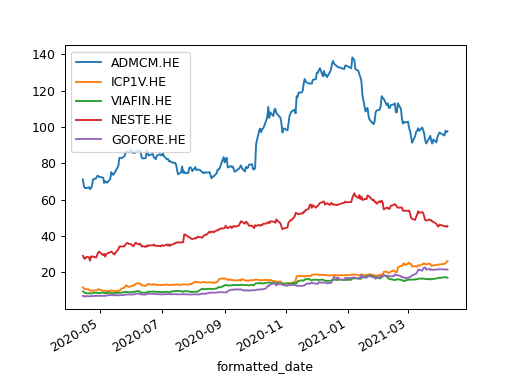

<AxesSubplot:xlabel='formatted_date'>

In [9]:
fig1, ax1 = plt.subplots()
data.plot(ax=ax1)

In [10]:
# Every row / first row
data/data.iloc[0]

,ADMCM.HE,ICP1V.HE,VIAFIN.HE,NESTE.HE,GOFORE.HE
formatted_date,,,,,
2020-04-14,1.000000,1.000000,1.000000,1.000000,1.000000
2020-04-15,0.947075,0.942238,0.968586,0.956986,1.000000
2020-04-16,0.933148,0.916968,0.921466,0.941981,0.948229
2020-04-17,0.933148,0.906137,0.900524,0.975992,0.991826
2020-04-20,0.938719,0.898917,0.890052,0.971991,0.983651
...,...,...,...,...,...
2021-04-01,1.361846,2.052389,1.785340,1.588958,3.086666
2021-04-06,1.339382,2.081829,1.816754,1.557446,3.072507
2021-04-07,1.375885,2.119680,1.821989,1.560186,3.044189


In [11]:
# Same using cumulated product
(data.pct_change() + 1).cumprod()

,ADMCM.HE,ICP1V.HE,VIAFIN.HE,NESTE.HE,GOFORE.HE
formatted_date,,,,,
2020-04-14,NaN,NaN,NaN,NaN,NaN
2020-04-15,0.947075,0.942238,0.968586,0.956986,1.000000
2020-04-16,0.933148,0.916968,0.921466,0.941981,0.948229
2020-04-17,0.933148,0.906137,0.900524,0.975992,0.991826
2020-04-20,0.938719,0.898917,0.890052,0.971991,0.983651
...,...,...,...,...,...
2021-04-01,1.361846,2.052389,1.785340,1.588958,3.086666
2021-04-06,1.339382,2.081829,1.816754,1.557446,3.072507
2021-04-07,1.375885,2.119680,1.821989,1.560186,3.044189


In [12]:
df = data/data.iloc[0]
df

,ADMCM.HE,ICP1V.HE,VIAFIN.HE,NESTE.HE,GOFORE.HE
formatted_date,,,,,
2020-04-14,1.000000,1.000000,1.000000,1.000000,1.000000
2020-04-15,0.947075,0.942238,0.968586,0.956986,1.000000
2020-04-16,0.933148,0.916968,0.921466,0.941981,0.948229
2020-04-17,0.933148,0.906137,0.900524,0.975992,0.991826
2020-04-20,0.938719,0.898917,0.890052,0.971991,0.983651
...,...,...,...,...,...
2021-04-01,1.361846,2.052389,1.785340,1.588958,3.086666
2021-04-06,1.339382,2.081829,1.816754,1.557446,3.072507
2021-04-07,1.375885,2.119680,1.821989,1.560186,3.044189


<IPython.core.display.Javascript object>


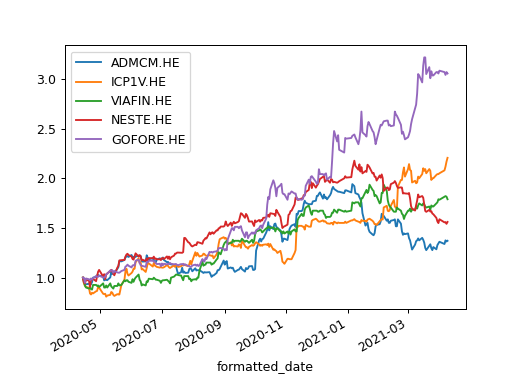

<AxesSubplot:xlabel='formatted_date'>

In [13]:
# Price growth
fig2, ax2 = plt.subplots()
df.plot(ax=ax2)

In [14]:
# Percentage
norm = (data/data.iloc[0])*100

<IPython.core.display.Javascript object>


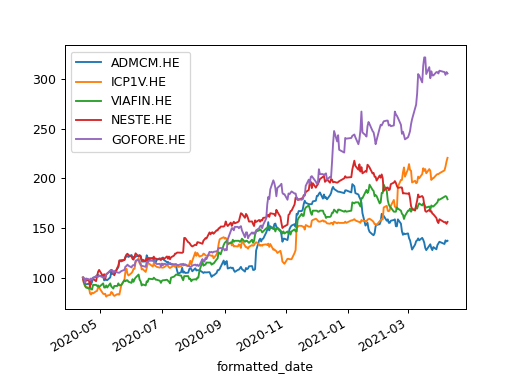

<AxesSubplot:xlabel='formatted_date'>

In [15]:
fig3, ax3 = plt.subplots()
norm.plot(ax=ax3)